In [1]:
pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/drive/MyDrive/CLIENT_3_PARSED_OUTPUT/pca_client3_complete.csv")

In [3]:
df.shape

(2000121, 41)

In [4]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,0,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175
1,1,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175
2,2,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175
3,3,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175
4,4,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175


In [5]:
df = df.drop("Unnamed: 0",axis=1)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,-0.893086,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175
1,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,-0.893086,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175
2,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,-0.893086,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175
3,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,-0.893086,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175
4,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,-0.893086,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175


In [7]:
df = np.array(df)

In [8]:
from minisom import MiniSom

In [11]:
SOM = MiniSom(30,30, 40, sigma=0.5, learning_rate=.1,neighborhood_function='gaussian',random_seed=100)

In [ ]:
SOM.train_batch(df, 1000, verbose=True)


 [ 1000 / 1000 ] 100% - 0:00:00 left 

In [ ]:
som_shape = (12,12)

In [ ]:
# each neuron represents a cluster
winner_coordinates = np.array([SOM.winner(x) for x in df]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

In [ ]:
(np.unique(cluster_index))

array([  0,   1,   2,   3,   4,   5,   6,  10,  11,  12,  13,  15,  16,
        17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,  32,  34,
        36,  37,  38,  39,  40,  41,  44,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  57,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  83,  84,
        85,  86,  88,  89,  90,  91,  93,  94,  95,  96, 100, 101, 104,
       105, 107, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 136, 137, 138,
       139, 140, 141, 142, 143])

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


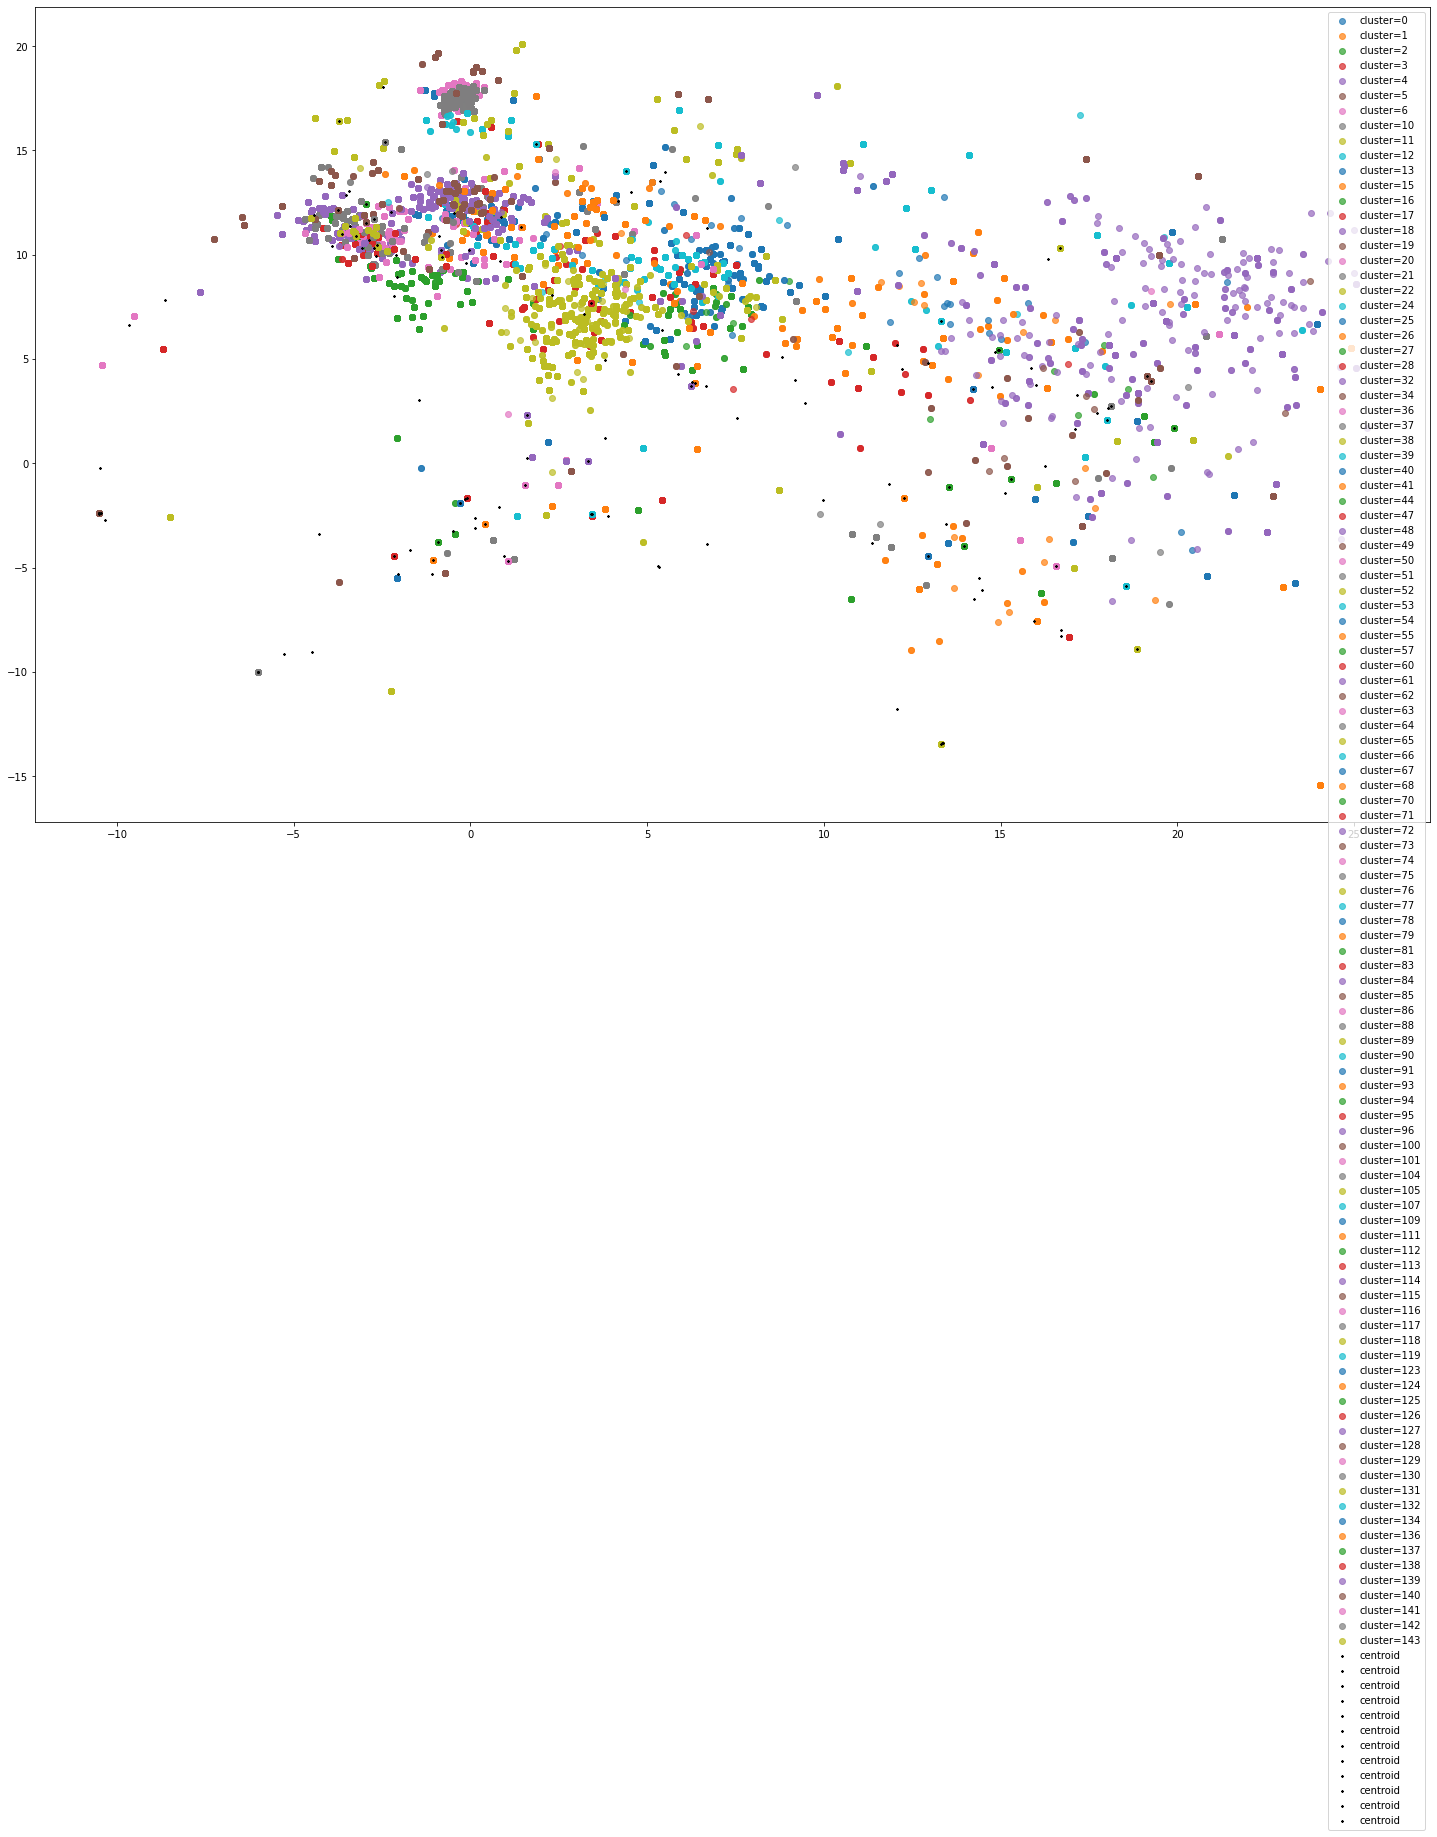

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(25,15))
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(df[cluster_index == c, 0],df[cluster_index == c, 1] ,label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in SOM.get_weights():
   plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',  s=3, linewidths=15, color='k', label='centroid')
plt.legend();

In [ ]:
for i in np.unique(cluster_index):
 print("cluster no. - > ",i," = ",len(df[cluster_index==i])," templates")

cluster no. - >  0  =  1  templates
cluster no. - >  1  =  21324  templates
cluster no. - >  2  =  5644  templates
cluster no. - >  3  =  26185  templates
cluster no. - >  4  =  30727  templates
cluster no. - >  5  =  169  templates
cluster no. - >  6  =  4010  templates
cluster no. - >  10  =  61196  templates
cluster no. - >  11  =  95319  templates
cluster no. - >  12  =  17211  templates
cluster no. - >  13  =  14129  templates
cluster no. - >  15  =  3  templates
cluster no. - >  16  =  1090  templates
cluster no. - >  17  =  194  templates
cluster no. - >  18  =  7434  templates
cluster no. - >  19  =  12539  templates
cluster no. - >  20  =  8241  templates
cluster no. - >  21  =  3222  templates
cluster no. - >  22  =  475599  templates
cluster no. - >  24  =  1335  templates
cluster no. - >  25  =  22651  templates
cluster no. - >  26  =  5543  templates
cluster no. - >  27  =  27280  templates
cluster no. - >  28  =  7623  templates
cluster no. - >  32  =  16  templates
clust

In [ ]:
cluster_0=df[cluster_index==0]
cluster_15=df[cluster_index==15]
cluster_32=df[cluster_index==32]
cluster_70=df[cluster_index==70]
cluster_88=df[cluster_index==88]
cluster_115=df[cluster_index==115]
cluster_116=df[cluster_index==116]

In [ ]:
cluster_0=pd.DataFrame(cluster_0)
cluster_15=pd.DataFrame(cluster_15)
cluster_32=pd.DataFrame(cluster_32)
cluster_70=pd.DataFrame(cluster_70)
cluster_88=pd.DataFrame(cluster_88)
cluster_115=pd.DataFrame(cluster_115)
cluster_116=pd.DataFrame(cluster_116)

In [ ]:
cluster_0


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,13.397867,12.773462,-0.940528,3.129902,-0.674063,3.468215,-0.347044,3.200986,-4.440184,3.459329,...,1.866889,3.177978,0.935648,-0.41815,4.142814,0.216573,2.383488,1.184898,2.250303,3.047217


In [ ]:
cluster_15

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,5.636512,8.583016,2.422941,3.857526,1.892096,-12.047438,-9.01992,0.481796,1.611717,-4.815842,...,-2.351338,-1.960311,-2.160479,-3.871462,-1.289164,3.926438,-0.457355,5.779414,-2.372731,-0.831925
1,5.636512,8.583016,2.422941,3.857526,1.892096,-12.047438,-9.01992,0.481796,1.611717,-4.815842,...,-2.351338,-1.960311,-2.160479,-3.871462,-1.289164,3.926438,-0.457355,5.779414,-2.372731,-0.831925
2,5.636512,8.583016,2.422941,3.857526,1.892096,-12.047438,-9.01992,0.481796,1.611717,-4.815842,...,-2.351338,-1.960311,-2.160479,-3.871462,-1.289164,3.926438,-0.457355,5.779414,-2.372731,-0.831925


In [ ]:
cluster=pd.concat((cluster_0 , cluster_15 ,cluster_32  ,cluster_70,cluster_88,cluster_115,cluster_116), ignore_index=True)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/CLIENT_3_PARSED_OUTPUT/pca_client3_complete.csv")

In [ ]:
filter1=data['0'].isin(cluster[0])
filter2=data['1'].isin(cluster[1])
filter3=data['2'].isin(cluster[2])
filter4=data['3'].isin(cluster[3])
filter5=data['4'].isin(cluster[4])
filter6=data['5'].isin(cluster[5])
filter7=data['6'].isin(cluster[6])
filter8=data['7'].isin(cluster[7])
filter9=data['8'].isin(cluster[8])
filter10=data['9'].isin(cluster[9])
filter11=data['10'].isin(cluster[10])
filter12=data['11'].isin(cluster[11])
filter13=data['12'].isin(cluster[12])
filter14=data['13'].isin(cluster[13])
filter15=data['14'].isin(cluster[14])
filter16=data['15'].isin(cluster[15])
filter17=data['16'].isin(cluster[16])
filter18=data['17'].isin(cluster[17])
filter19=data['18'].isin(cluster[18])
filter20=data['19'].isin(cluster[19])
filter21=data['20'].isin(cluster[20])
filter22=data['21'].isin(cluster[21])
filter23=data['22'].isin(cluster[22])
filter24=data['23'].isin(cluster[23])
filter25=data['24'].isin(cluster[24])
filter26=data['25'].isin(cluster[25])
filter27=data['26'].isin(cluster[26])
filter28=data['27'].isin(cluster[27])
filter29=data['28'].isin(cluster[28])
filter30=data['29'].isin(cluster[29])
filter31=data['30'].isin(cluster[30])
filter32=data['31'].isin(cluster[31])
filter33=data['32'].isin(cluster[32])
filter34=data['33'].isin(cluster[33])
filter35=data['34'].isin(cluster[34])
filter36=data['35'].isin(cluster[35])
filter37=data['36'].isin(cluster[36])
filter38=data['37'].isin(cluster[37])
filter39=data['38'].isin(cluster[38])
filter40=data['39'].isin(cluster[39])

In [ ]:
data[filter1 & filter2 & filter3 & filter4 & filter5 & filter6 & filter7 & filter8 & filter9 & filter10 & filter11 & filter12 & filter13 & filter14 & filter15 & filter16 & filter17 & filter18 & filter19 & filter20 & filter21 & filter22 & filter23 & filter24 & filter25 & filter26 & filter27 & filter28 & filter29 & filter30 & filter31 & filter32 & filter33 & filter34 & filter35 & filter36 & filter37 & filter38 & filter39 & filter40    ]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
6827,6827,14.505409,0.934600,-0.078512,2.641781,-2.755434,7.508788,3.179775,-0.546200,-3.606339,...,2.293473,2.551123,-0.958588,-1.812598,1.618725,0.171120,1.305144,2.089590,-1.551604,-0.655592
31707,31707,14.505409,0.934600,-0.078512,2.641781,-2.755434,7.508788,3.179775,-0.546200,-3.606339,...,2.293473,2.551123,-0.958588,-1.812598,1.618725,0.171120,1.305144,2.089590,-1.551604,-0.655592
100997,100997,14.505409,0.934600,-0.078512,2.641781,-2.755434,7.508788,3.179775,-0.546200,-3.606339,...,2.293473,2.551123,-0.958588,-1.812598,1.618725,0.171120,1.305144,2.089590,-1.551604,-0.655592
101023,101023,14.505409,0.934600,-0.078512,2.641781,-2.755434,7.508788,3.179775,-0.546200,-3.606339,...,2.293473,2.551123,-0.958588,-1.812598,1.618725,0.171120,1.305144,2.089590,-1.551604,-0.655592
221999,221999,-0.434870,-1.900462,-2.689861,-0.912115,1.706422,3.831205,-3.081276,-4.591663,0.133487,...,0.421602,0.542317,1.101111,2.069982,0.521936,-2.182897,-0.905071,-2.458478,4.806088,0.209261
587406,587406,14.505409,0.934600,-0.078512,2.641781,-2.755434,7.508788,3.179775,-0.546200,-3.606339,...,2.293473,2.551123,-0.958588,-1.812598,1.618725,0.171120,1.305144,2.089590,-1.551604,-0.655592
587456,587456,14.505409,0.934600,-0.078512,2.641781,-2.755434,7.508788,3.179775,-0.546200,-3.606339,...,2.293473,2.551123,-0.958588,-1.812598,1.618725,0.171120,1.305144,2.089590,-1.551604,-0.655592
597129,597129,14.505409,0.934600,-0.078512,2.641781,-2.755434,7.508788,3.179775,-0.546200,-3.606339,...,2.293473,2.551123,-0.958588,-1.812598,1.618725,0.171120,1.305144,2.089590,-1.551604,-0.655592
657233,657233,14.505409,0.934600,-0.078512,2.641781,-2.755434,7.508788,3.179775,-0.546200,-3.606339,...,2.293473,2.551123,-0.958588,-1.812598,1.618725,0.171120,1.305144,2.089590,-1.551604,-0.655592
657259,657259,14.505409,0.934600,-0.078512,2.641781,-2.755434,7.508788,3.179775,-0.546200,-3.606339,...,2.293473,2.551123,-0.958588,-1.812598,1.618725,0.171120,1.305144,2.089590,-1.551604,-0.655592


In [ ]:
srch=np.array(list(data[filter1 & filter2 & filter3 & filter4 & filter5 & filter6 & filter7 & filter8 & filter9 & filter10 & filter11 & filter12 & filter13 & filter14 & filter15 & filter16 & filter17 & filter18 & filter19 & filter20 & filter21 & filter22 & filter23 & filter24 & filter25 & filter26 & filter27 & filter28 & filter29 & filter30 & filter31 & filter32 & filter33 & filter34 & filter35 & filter36 & filter37 & filter38 & filter39 & filter40    ].index))

In [ ]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

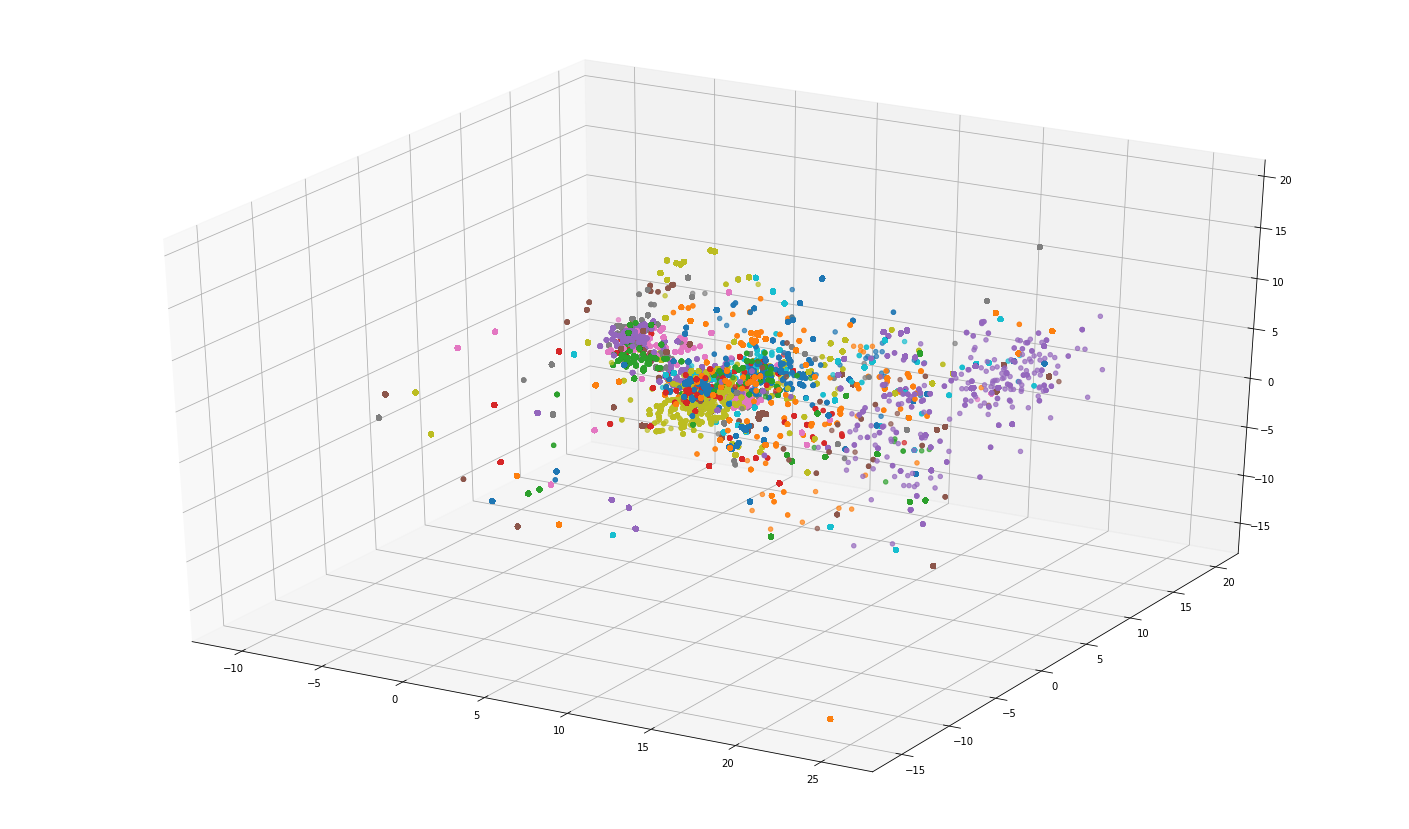

In [ ]:
fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(111, projection='3d')
for c in np.unique(cluster_index):
  ax.scatter(df[cluster_index == c, 0],df[cluster_index == c, 1],df[cluster_index == c, 2],label='cluster='+str(c), alpha=.7)

In [ ]:
search=pd.read_csv("/content/drive/MyDrive/CLIENT_3_PARSED_OUTPUT/client_3_templates_structure.csv")

In [ ]:
search

,Unnamed: 0,seq_no,proc_id,nano_ts,Content,EventId,EventTemplate,ParameterList
0,1986140,0,adservice,1649918692947838114,"""{""""thread"""":""""grpc-default-executor-33"""",""""le...",a35c1f6e,"""{""""thread"""" <*> """"level"""" """"INFO"""" """"loggerNa...","['grpc-default-executor-33', '', '', '', 'rece..."
1,1986141,1,adservice,1649918692947922851,"""{""""thread"""":""""grpc-default-executor-34"""",""""le...",a35c1f6e,"""{""""thread"""" <*> """"level"""" """"INFO"""" """"loggerNa...","['grpc-default-executor-34', '', '', '', 'rece..."
2,1986142,2,adservice,1649918692990859290,"""{""""thread"""":""""grpc-default-executor-34"""",""""le...",a35c1f6e,"""{""""thread"""" <*> """"level"""" """"INFO"""" """"loggerNa...","['grpc-default-executor-34', '', '', '', 'rece..."
3,1986143,3,adservice,1649918693250414599,"""{""""thread"""":""""grpc-default-executor-34"""",""""le...",a35c1f6e,"""{""""thread"""" <*> """"level"""" """"INFO"""" """"loggerNa...","['grpc-default-executor-34', '', '', '', 'rece..."
4,1986144,4,adservice,1649918693618039922,"""{""""thread"""":""""grpc-default-executor-34"""",""""le...",a35c1f6e,"""{""""thread"""" <*> """"level"""" """"INFO"""" """"loggerNa...","['grpc-default-executor-34', '', '', '', 'rece..."
...,...,...,...,...,...,...,...,...
2000116,814035,2000229,recommendationservice,1649937915006990668,},cbb184dd,},[]
2000117,814036,2000230,recommendationservice,1649937915006996325,},cbb184dd,},[]
2000118,814037,2000231,recommendationservice,1649937915007001972,{,f95b70fd,{,[]
2000119,814038,2000232,recommendationservice,1649937915007007725,"""""""name"""": """"/hipstershop.ProductCatalogServic...",06ad4f63,"<*> <*> ""","['', 'name"""": """"/hipstershop.ProductCatalogSer..."


In [ ]:
anomaly=pd.DataFrame([])

""


In [ ]:
for i in srch:
  anomaly=anomaly.append([search.loc[[i]]])

In [ ]:
anomaly

,Unnamed: 0,seq_no,proc_id,nano_ts,Content,EventId,EventTemplate,ParameterList
6827,814063,6839,cartservice,1649919287598226651,net.peer.ip: ::ffff:127.0.0.1,130fa472,net.peer.ip ffff 127.0.0.1,[]
31707,836553,31721,cartservice,1649919436240763932,net.peer.ip: ::ffff:127.0.0.1,130fa472,net.peer.ip ffff 127.0.0.1,[]
100997,893321,101019,cartservice,1649919736242807353,net.peer.ip: ::ffff:127.0.0.1,130fa472,net.peer.ip ffff 127.0.0.1,[]
101023,893347,101045,cartservice,1649919736336581295,net.peer.ip: ::ffff:127.0.0.1,130fa472,net.peer.ip ffff 127.0.0.1,[]
221999,1804691,222021,loadgenerator,1649919303946390072,session-id: d7f7034a-bc5b-4079-9164-f548ee6aaa...,01361c2f,session-id <*>,['d7f7034a-bc5b-4079-9164-f548ee6aaa50</br']
587406,942979,587428,cartservice,1649921595763391674,net.peer.ip: ::ffff:127.0.0.1,130fa472,net.peer.ip ffff 127.0.0.1,[]
587456,943029,587478,cartservice,1649921666503005344,net.peer.ip: ::ffff:127.0.0.1,130fa472,net.peer.ip ffff 127.0.0.1,[]
597129,948965,597151,cartservice,1649921740760071508,net.peer.ip: ::ffff:127.0.0.1,130fa472,net.peer.ip ffff 127.0.0.1,[]
657233,1007200,657255,cartservice,1649922040848595550,net.peer.ip: ::ffff:127.0.0.1,130fa472,net.peer.ip ffff 127.0.0.1,[]
657259,1007226,657281,cartservice,1649922040947014706,net.peer.ip: ::ffff:127.0.0.1,130fa472,net.peer.ip ffff 127.0.0.1,[]


In [ ]:
len(anomaly["EventId"].unique())

7

In [ ]:
anomaly.to_csv("/content/drive/MyDrive/CLIENT_3_PARSED_OUTPUT/anomaly.csv")